In [60]:
import pandas as pd
import numpy as np
import sys, os , time, pickle
from tabulate import tabulate
import matplotlib.pyplot as plt

def find_match(string,list_des):
    return [value for value in list_des if string in value]

def plot_files(file_name):
    print("\nFile to show: ",file_name)
    table = pd.read_csv(folder+file_name)
    print(tabulate(table, headers='keys', tablefmt='rst')) #latex
    
methods_list = ["Ann(tr)","softMV","hardMV", "DS", "Raykar", "OursGlobal", ""]
methods_list_aux = ["soft-MV","hard-MV", "D&S", "Raykar", "Ours Global","",]

def get_value(lista, name):
    return np.asarray([value[name][0] if type(value)== pd.DataFrame else "-" for value in lista] )

def calculate_aux(archivo,what_to_do="mv",model=""):
    try:
        f = open(archivo)
        result_list = []
        for line in f.readlines():
            if what_to_do == "mv":
                if "ACC MV" in line: 
                    result_list.append(float(line.split(" ")[-1].strip()))
            elif what_to_do == 'epochs':
                if "Epochs to converge" in line and model in line: 
                    result_list.append(float(line.split(" ")[-1].strip()))
        f.close()
        return result_list
    except:
        return "-"
!ls

CIFAR  Plot_Results.ipynb  simple  simple_soft	simple_v2


In [56]:
type(results_ds_test[0]) 

True

In [5]:
!ls CIFAR
folder = "CIFAR//"
files = sorted(os.listdir(folder))

results.txt		       synthetic_OursGlobal_testAux.pickle
simCIFAR_UpperBound_test.csv   synthetic_OursGlobal_test.pickle
simCIFAR_UpperBound_train.csv  synthetic_OursGlobal_train.pickle
synthetic_DS_test.pickle       synthetic_Raykar_test.pickle
synthetic_DS_train.pickle      synthetic_Raykar_train.pickle
synthetic_hardMV_test.pickle   synthetic_softMV_test.pickle
synthetic_hardMV_train.pickle  synthetic_softMV_train.pickle


In [3]:
to_check = [100,500,1500,3500,6000,10000]
T_data = 5 #for now is this..
N = 2500
D_t = np.asarray([N*T_data/T for T in to_check])

In [6]:
with open(folder+'synthetic_softMV_train.pickle', 'rb') as handle:
    results_softmv_train = pickle.load(handle)
with open(folder+'synthetic_softMV_test.pickle', 'rb') as handle:
    results_softmv_test = pickle.load(handle)    
with open(folder+'synthetic_hardMV_train.pickle', 'rb') as handle:
    results_hardmv_train = pickle.load(handle)
with open(folder+'synthetic_hardMV_test.pickle', 'rb') as handle:
    results_hardmv_test =pickle.load(handle)
with open(folder+'synthetic_DS_train.pickle', 'rb') as handle:
    results_ds_train = pickle.load(handle)
with open(folder+'synthetic_DS_test.pickle', 'rb') as handle:
    results_ds_test = pickle.load(handle)
with open(folder+'synthetic_Raykar_train.pickle', 'rb') as handle:
    results_raykar_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_Raykar_trainAnn.pickle', 'rb') as handle:
        results_raykar_trainA = pickle.load(handle)
with open(folder+'synthetic_Raykar_test.pickle', 'rb') as handle:
    results_raykar_test = pickle.load(handle)
with open(folder+'synthetic_OursGlobal_train.pickle', 'rb') as handle:
    results_ours_global_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_OursGlobal_trainAnn.pickle', 'rb') as handle:
        results_ours_global_trainA =pickle.load(handle)
with open(folder+'synthetic_OursGlobal_test.pickle', 'rb') as handle:
    results_ours_global_test =pickle.load(handle)
with open(folder+'synthetic_OursGlobal_testAux.pickle', 'rb') as handle:
    results_ours_global_testA = pickle.load(handle)

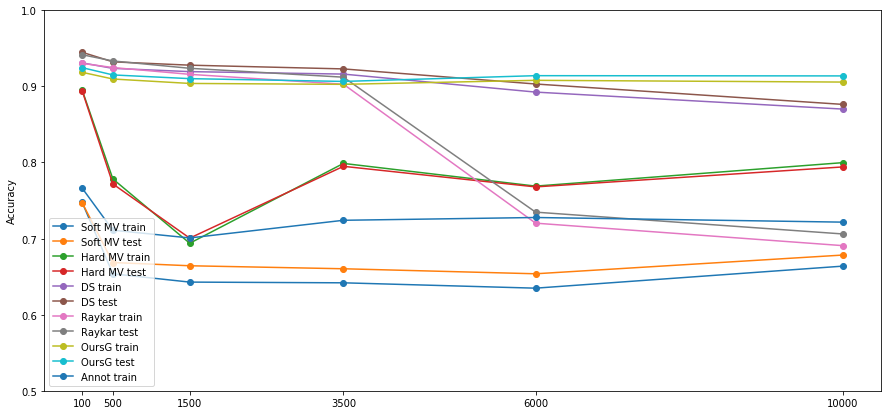

In [5]:
plt.figure(figsize=(15,7))
plt.plot(to_check, get_value(results_softmv_train,"Accuracy"), 'o-', label="Soft MV train")
plt.plot(to_check, get_value(results_softmv_test,"Accuracy"), 'o-',label="Soft MV test")

plt.plot(to_check, get_value(results_hardmv_train,"Accuracy"), 'o-',label="Hard MV train")
plt.plot(to_check, get_value(results_hardmv_test,"Accuracy"), 'o-',label="Hard MV test")

plt.plot(to_check, get_value(results_ds_train,"Accuracy"), 'o-',label="DS train")
plt.plot(to_check, get_value(results_ds_test,"Accuracy"), 'o-',label="DS test")


plt.plot(to_check, get_value(results_raykar_train,"Accuracy"), 'o-',label="Raykar train")
plt.plot(to_check, get_value(results_raykar_test,"Accuracy"), 'o-',label="Raykar test")

plt.plot(to_check, get_value(results_ours_global_train,"Accuracy"), 'o-',label="OursG train")
plt.plot(to_check, get_value(results_ours_global_test,"Accuracy"), 'o-',label="OursG test")

plt.plot(to_check,calculate_aux(folder+"results.txt",what_to_do="mv"), 'o-',label="Annot train")
plt.xticks(to_check)
plt.legend(loc="lower left")
plt.ylim(0.5,1)
plt.ylabel("Accuracy")
plt.show()

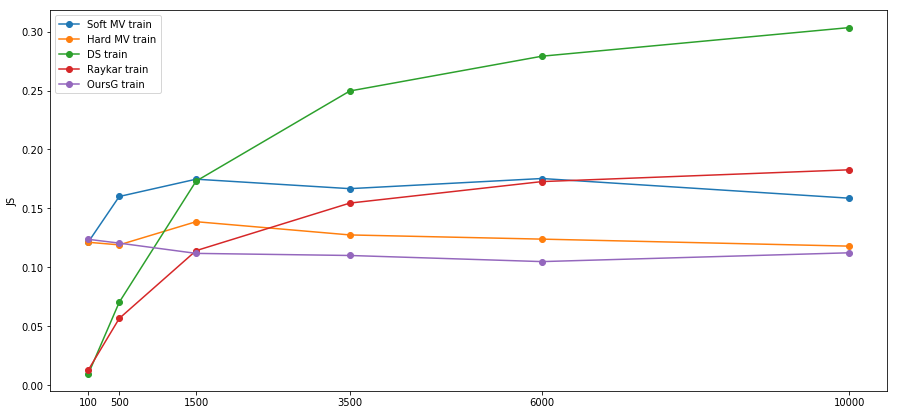

In [53]:

plt.figure(figsize=(15,7))
plt.plot(to_check, get_value(results_softmv_train,"Mean JS"), 'o-', label="Soft MV JS")
#plt.plot(to_check, get_value(results_softmv_test,"Accuracy"), 'o-',label="Soft MV test")

plt.plot(to_check, get_value(results_hardmv_train,"Mean JS"), 'o-',label="Hard MV JS")
#plt.plot(to_check, get_value(results_hardmv_test,"Accuracy"), 'o-',label="Hard MV test")

plt.plot(to_check, get_value(results_ds_train,"Mean JS"), 'o-',label="DS JS")
#plt.plot(to_check, get_value(results_ds_test,"Accuracy"), 'o-',label="DS test")

plt.plot(to_check, get_value(results_raykar_train,"Mean JS"), 'o-',label="Raykar JS")
#plt.plot(to_check, get_value(results_raykar_test,"Accuracy"), 'o-',label="Raykar test")

plt.plot(to_check, get_value(results_ours_global_train,"Mean JS"), 'o-',label="OursG JS")
#plt.plot(to_check, get_value(results_ours_global_test,"Accuracy"), 'o-',label="OursG test")

plt.xticks(to_check)
plt.legend(loc="upper left")
#plt.ylim(0.5,1)
plt.ylabel("JS")
plt.show()

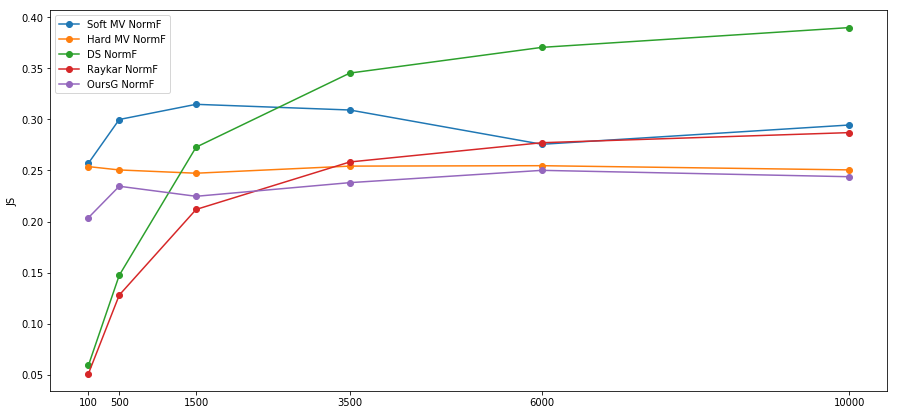

In [9]:

plt.figure(figsize=(15,7))
#plt.plot(to_check, get_value(results_softmv_train,"Mean JS"), 'o-', label="Soft MV JS")
plt.plot(to_check, get_value(results_softmv_train,"Mean NormF"), 'o-',label="Soft MV NormF")

#plt.plot(to_check, get_value(results_hardmv_train,"Mean JS"), 'o-',label="Hard MV JS")
plt.plot(to_check, get_value(results_hardmv_train,"Mean NormF"), 'o-',label="Hard MV NormF")

#plt.plot(to_check, get_value(results_ds_train,"Mean JS"), 'o-',label="DS JS")
plt.plot(to_check, get_value(results_ds_train,"Mean NormF"), 'o-',label="DS NormF")

#plt.plot(to_check, get_value(results_raykar_train,"Mean JS"), 'o-',label="Raykar JS")
plt.plot(to_check, get_value(results_raykar_train,"Mean NormF"), 'o-',label="Raykar NormF")

#plt.plot(to_check, get_value(results_ours_global_train,"Mean JS"), 'o-',label="OursG JS")
plt.plot(to_check, get_value(results_ours_global_train,"Mean NormF"), 'o-',label="OursG NormF")

plt.xticks(to_check)
plt.legend(loc="upper left")
#plt.ylim(0.5,1)
plt.ylabel("JS")
plt.show()

In [69]:
def create_df(method_l,T_try,value):
    t = pd.DataFrame(np.zeros((len(method_l),len(T_try))))
    t.columns = T_try
    t.index = method_l
    if value == "Accuracy" or "F1" in value:
        if len(calculate_aux(folder+"results.txt",what_to_do="mv")) > len(T_try) +1:
            aux2 = calculate_aux(folder+"results.txt",what_to_do="mv")
            aux = [np.mean(aux2[i:30*(i+1)]) for i in range(0,len(aux2),30)]
        else:
            aux = calculate_aux(folder+"results.txt",what_to_do="mv")
        #t.loc["Ann(tr)",:] = aux
        t.loc["softMV",:] = get_value(results_softmv_test,value)
        t.loc["hardMV",:] = get_value(results_hardmv_test,value)
        t.loc["DS",:] = get_value(results_ds_test,value)
        t.loc["Raykar",:] = get_value(results_raykar_test,value)
        t.loc["OursGlobal",:] = get_value(results_ours_global_test,value)
    else:
        t.index = ["D_t"]+method_l[1:]
        t.loc["D_t",:] = D_t
        t.loc["softMV",:] = get_value(results_softmv_train,value)
        t.loc["hardMV",:] = get_value(results_hardmv_train,value)
        t.loc["DS",:] = get_value(results_ds_train,value)
        t.loc["Raykar",:] = get_value(results_raykar_train,value)
        t.loc["OursGlobal",:] = get_value(results_ours_global_train,value)
    return t.round(5)

In [70]:
t = create_df(methods_list,to_check,"Accuracy")
t

,100,500,1500,3500,6000,10000
Ann(tr),0,0,0,0,0,0
softMV,0.61424,0.62914,0.65054,0.6282,0.64178,0.6576
hardMV,0.70124,0.70324,0.69502,0.66932,0.70924,0.7032
DS,0.69104,0.68398,0.67726,0.65864,-,-
Raykar,0.8174199999999999,0.8074999999999999,0.7713,0.71168,-,-
OursGlobal,0.7919,0.7852,0.78958,0.79106,0.78474,0.7834
,0,0,0,0,0,0


In [73]:
t = create_df(methods_list,to_check,"Mean JS")
#t = create_df(methods_list,to_check,"Mean NormF")
t

,100,500,1500,3500,6000,10000
D_t,125,25,8.33333,3.57143,2.08333,1.25
softMV,0.109761,0.110461,0.0902271,0.107817,0.106338,0.0923568
hardMV,0.0811448,0.0824611,0.0859186,0.0870304,0.082615,0.0801674
DS,0.0223455382329656,0.08870079765160195,0.1713395850915781,0.2624603426616479,-,-
Raykar,0.012549800514781486,0.05274377550517031,0.12981576114387874,0.2120478273499103,-,-
OursGlobal,0.114604,0.132807,0.122176,0.121524,0.126486,0.133579
,0,0,0,0,0,0


In [55]:
print(tabulate(t,headers='keys',tablefmt='latex'))

\begin{tabular}{lrrrrrr}
\hline
            &      100 &     500 &   1500 &   3500 &   6000 &   10000 \\
\hline
 D\_t        & 125      & 25      & 8.3333 & 3.5714 & 2.0833 &  1.25   \\
 softMV     &   0.2734 &  0.2616 & 0.2561 & 0.2715 & 0.2674 &  0.2396 \\
 hardMV     &   0.2011 &  0.2055 & 0.2058 & 0.2029 & 0.2028 &  0.197  \\
 DS         &   0.0761 &  0.1775 & 0.2907 & 0.3537 & 0.3711 &  0.386  \\
 Raykar     &   0.0657 &  0.129  & 0.191  & 0.2298 & 0.2444 &  0.2505 \\
 OursGlobal &   0.2667 &  0.2273 & 0.2209 & 0.2068 & 0.215  &  0.2208 \\
            &   0      &  0      & 0      & 0      & 0      &  0      \\
\hline
\end{tabular}
